# Taller de problemas

## Práctica de filtrado
1.  Hagan un código que regrese la primera letra de cada palabra en una lista. (Output es una lista de las primeras letras).
2.  Hagan un código que regrese solamente las palábras con 5 letras o menos de una lista.
3.  Hagan un código que reciba una lista de precios en pesos y los convierta en dólares (Asumir que 20 pesos = 1 dólar).
4.  Si hicieron lo anterior con una función map, reduce o filter; hagan una comprensión.

## Trabajo del fin de Semana
1. Utilizando BeautifulSoup4; scrappea una página de mercado libre con las propiedades: (Nombre del producto, Precio, Precio original, numero de ventas). 
2. Ahora transforma los datos númericos para que sean de type(int) o type(float) en lugar de string 
3. Con esos datos, genera un dataframe.
4. Crea una nueva columna en donde conviertas el precio en pesos a dólares (1 dólar=20 pesos).
5. Guarda el dataframe en un archivo csv.
6. Usando BS4, crea una manera de acceder a las siguientes 2 páginas del departamento en donde te encuentres. (Mercadolibre con las mismas variables).
7. Scrappea las 3 páginas para tener una lista más grande.
8. Nuevamente transforma los datos numéricos para que sean int o float en lugar de string.
9. Genera un dataframe.
10. Crea una nueva columna en donde conviertas el precio de pesos a dólares (1 dólar=20 pesos).
11. Muestra un histograma de la distribución de los precios de celulares.


# Reto
1. Ahora repite el reto usando Scrapy: (Nombre del producto, Precio, Precio de descuento, número de ventas)
2. Usa los selectores que gustes
3. Exporta el archivo a csv
4. Importa el archivo csv a tu libreta de jupyter.

# Otros sitios Scrapping
Aeropuerto Ciudad de México

http://www.ift.org.mx  (Para descargar datos ya hecho)

Despegar.com.mx

Trivago.com.mx

Coneval (Datos procesados)

http://premio.ceneval.edu.mx/premio_egel/index.jsf (Scrappear texto limpio y filtrado)

VivaAerobus.com


In [4]:
# Ejercicio 1
#1.  Hagan un código que regrese la primera letra de cada palabra en una lista. (Output es una lista de las primeras letras).
my_list = ['perro', 'gato', 'oso', 'caiman', 'tejon', 'coati', 'jirafa', 'hipopotamo', 'puma', 'tigre']

# Using Map
letters = list(map(lambda x : x[0], my_list))
print(letters)

# Using List comprehension
letters = [word[0] for word in letters]
print(letters)

['p', 'g', 'o', 'c', 't', 'c', 'j', 'h', 'p', 't']
['p', 'g', 'o', 'c', 't', 'c', 'j', 'h', 'p', 't']


In [7]:
# Ejercicio 2
#2.  Hagan un código que regrese solamente las palábras con 5 letras o menos de una lista.
my_list = ["ocean","parched","damp","obtainable","repair","extend","grass","succeed","cloistered","farflung","babies","domineering"]

# Using Filter
short_list = list(filter(lambda x: len(x) <= 5, my_list))
print(short_list)

# Using List comprehension
short_list = [word for word in my_list if len(word) <= 5]
print(short_list)

['ocean', 'damp', 'grass']
['ocean', 'damp', 'grass']


In [11]:
# Ejercicio 3
#3.  Hagan un código que reciba una lista de precios en pesos y los convierta en dólares (Asumir que 20 pesos = 1 dólar).
usd_mxn_value = 20.0
prices_in_mxn = [0, 25, 7373, 90192, 36, 992, 644, 82891, 3832]

# Using map
prices_in_usd = list(map(lambda x: x / usd_mxn_value, prices_in_mxn))
print(prices_in_usd)

# Using List comprehension
prices_in_usd = [price / usd_mxn_value for price in prices_in_mxn]
print(prices_in_usd)

[0.0, 1.25, 368.65, 4509.6, 1.8, 49.6, 32.2, 4144.55, 191.6]
[0.0, 1.25, 368.65, 4509.6, 1.8, 49.6, 32.2, 4144.55, 191.6]


In [13]:
## WebScrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Requests
URL0 = 'https://autos.mercadolibre.com.mx/_Tienda_kavak'
URL1 = 'https://autos.mercadolibre.com.mx/_Desde_49_Tienda_kavak'
URL2 = 'https://autos.mercadolibre.com.mx/_Desde_97_Tienda_kavak'
URL0 = BeautifulSoup(requests.get(URL0).text, "lxml")
URL1 = BeautifulSoup(requests.get(URL1).text, "lxml")
URL2 = BeautifulSoup(requests.get(URL2).text, "lxml")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C774C7DE08>]],
      dtype=object)

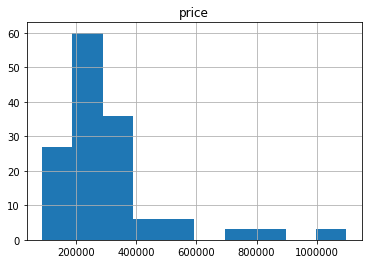

In [6]:
def get_cars(bs_element):
    cars = []
    for car_element in URL0.find_all('li', {'class': 'results-item'}):
        car = {}
        car['price'] = int(car_element.find('span', {'class': 'price__fraction'}).text.replace(",", ""))
        item_attrs = car_element.find('div', {'class': 'item__attrs'}).text.split("|")
        car['year'] = int(item_attrs[0])
        car['km'] = int(item_attrs[1].split(" km")[0])
        car['title'] = car_element.find('span', {'class': 'main-title'}).text
        car['location'] = car_element.find('div', {'class': 'item__location'}).text
        cars.append(car)
    return cars

cars = []        
cars = cars + get_cars(URL0) + get_cars(URL1) + get_cars(URL2)

df = pd.DataFrame(cars)
df.to_csv('./cars.csv')

df['price_in_usd'] = df['price'] / 20.0
df.hist(column='price')